**PREDICTING RAIN IN AUSTRILIA**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv('https://raw.githubusercontent.com/tjkyner/australian-rain-prediction/main/weatherAUS.csv')

##Print first 5 rows of dataset

In [ ]:
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [ ]:
data.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

##information of each column

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

## Print number of rows and column in our dataset

In [ ]:
data.shape

(145460, 23)



---
## Describing mean, median,standard deviation in data 


In [ ]:
data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [ ]:
print(data.dtypes)

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object


## printing values of categorical column

In [ ]:
data.dtypes[data.dtypes == 'object'].index.unique()

Index(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm',
       'RainToday', 'RainTomorrow'],
      dtype='object')

##Checking for missing values

In [ ]:
data.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [ ]:
array = data.values
X = array[:,0:22]
Y = array[:,22]

In [ ]:
# List of features that will be changed
winds = ['WindGustDir', 'WindDir3pm', 'WindDir9am']
    
# Doing the transformation with "get_dummies"
df = pd.get_dummies(data, columns=winds)

# Cheking the new shape
df.shape

(145460, 68)

## Dropping unwanted column from our dataset

In [ ]:
df = df.drop(['WindGustDir_WSW', 'WindDir3pm_SSW', 'WindDir9am_NNE','Location','Date', 'Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm'], axis =1)
df.shape

(145460, 59)

In [ ]:
df['RainToday'].replace({'No': 0, 'Yes': 1},inplace = True)
df['RainTomorrow'].replace({'No': 0, 'Yes': 1},inplace = True)

In [ ]:
df.RainToday.value_counts()

0.0    110319
1.0     31880
Name: RainToday, dtype: int64

In [ ]:
df.RainTomorrow.value_counts()


0.0    110316
1.0     31877
Name: RainTomorrow, dtype: int64

## Droping Null values rows

In [ ]:
df.dropna(inplace=True)

## Doing the escalation using "MinMaxScale" model


In [ ]:
scaler = preprocessing.MinMaxScaler()
# Training the model
scaler.fit(df)
# Changing data 
df = pd.DataFrame(scaler.transform(df), index=df.index, columns=df.columns)
# Returning the data frama after the escalation
df.head()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,...,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW
0,0.513064,0.446154,0.001632,0.294574,0.229885,0.275862,0.71,0.22,0.449587,0.4800,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.370546,0.494505,0.000000,0.294574,0.045977,0.252874,0.44,0.25,0.497521,0.4912,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.501188,0.507692,0.000000,0.310078,0.218391,0.298851,0.38,0.30,0.447934,0.5056,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.413302,0.558242,0.000000,0.139535,0.126437,0.103448,0.45,0.16,0.613223,0.5712,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.610451,0.652747,0.002720,0.271318,0.080460,0.229885,0.82,0.33,0.500826,0.4624,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Finding the best features in our dataset

In [ ]:
X = df.loc[:,df.columns!='RainTomorrow']
y = df[['RainTomorrow']]
# Using função SelectKBest and determining the parameters numbers of features, K = 58
selector = SelectKBest(chi2, k=58)
# Traning
selector.fit(X, y)
# Returning scores
scores = selector.scores_
# Creating a list for features names
lista = df.columns
lista = [x for x in lista if x != 'RainTomorrow']
# Creationg a dictionaty with the features name list and scores  
unsorted_pairs = zip(lista, scores)
sorted_pairs = list(reversed(sorted(unsorted_pairs, key=lambda x: x[1])))
k_best_features = dict(sorted_pairs[:58])

##  Plotting graph for K_best score

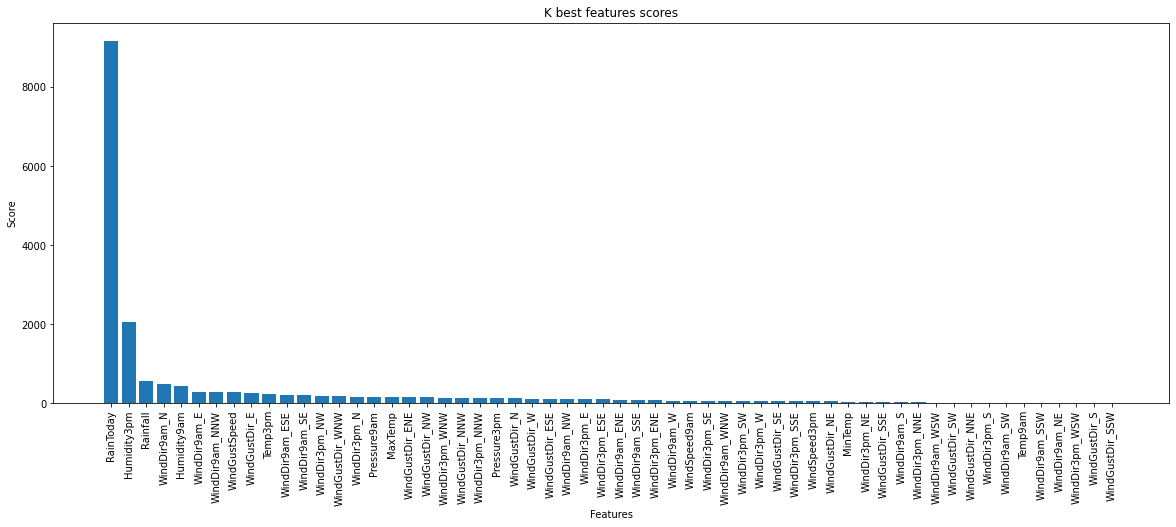

In [ ]:
# Ploting the graphic area
plt.figure(figsize=(20,7),facecolor = 'w',edgecolor = 'w')
# Ploting the bar graphic
p = plt.bar(range(len(k_best_features)), list(k_best_features.values()), align='center')
plt.xticks(range(len(k_best_features)), list(k_best_features.keys()))
# Editing the names
plt.xticks(rotation='90')
plt.title('K best features scores')
plt.xlabel('Features')
plt.ylabel('Score')
plt.show()

Now we can see that RainToday is the most important feature for the models. The features about wind direction don't have high scores. I will use just features that have scores above 1% (71 points) RainToday score (7136 points).



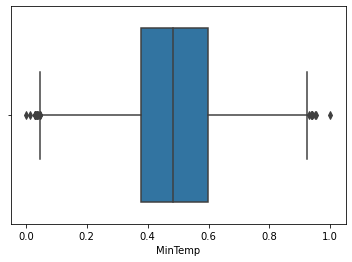

In [ ]:
sns.boxplot(x=df['MinTemp'])
plt.show()

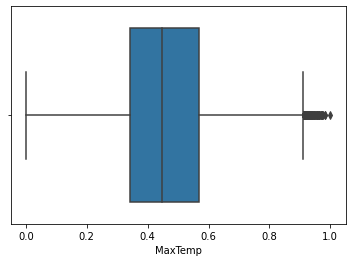

In [ ]:
sns.boxplot(x=df['MaxTemp'])
plt.show()

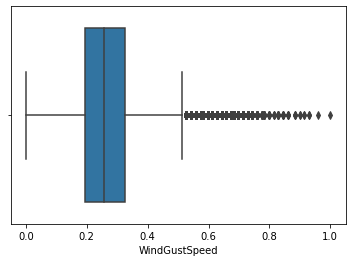

In [ ]:
sns.boxplot(x=df['WindGustSpeed'])
plt.show()

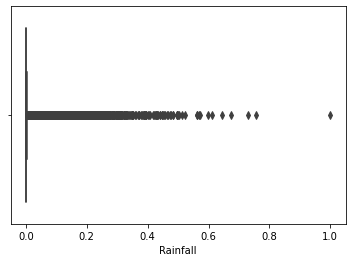

In [ ]:
sns.boxplot(x=df['Rainfall'])
plt.show()

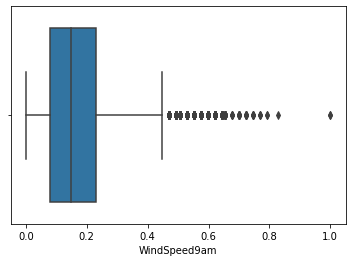

In [ ]:
sns.boxplot(x=df['WindSpeed9am'])
plt.show()

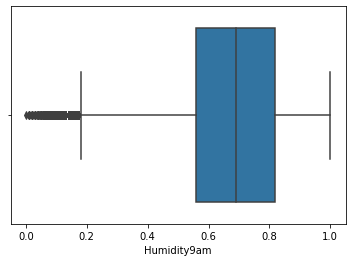

In [ ]:
sns.boxplot(x=df['Humidity9am'])
plt.show()

An exemple of outliers can be observed in the Humidity9am graph. There as some values of 0 and 100 about Humidity, this values are unreals to be found in a open space.

To remove outliers we can use the Z-score technic. 

In [ ]:
import seaborn as sns


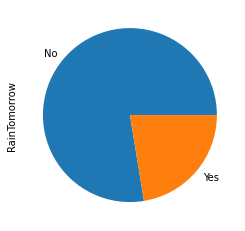

In [136]:
data['RainTomorrow'].value_counts().plot(kind='pie')
